In [1]:
#Linear Regression in Python with Scikit-Learn
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
#%matplotlib inline

#-------------- IMPORT DATA HERE --------------
dataset = pd.read_csv(r'C:\PYTHON LEARNING\STATISTIC\DATA RESEARCH\abs video.csv')
#--------------------------------------------

In [2]:
#tính kích cỡ dữ liệu
print('>>>>>>>>>>>>>>> kích cỡ dữ liệu:',dataset.shape)
print('>>>>>>>>>>>>>>> các biến có trong tệp data:')
print(dataset.dtypes) #xác định các biến có trong data (tìm tiêu đề))

>>>>>>>>>>>>>>> kích cỡ dữ liệu: (72, 14)
>>>>>>>>>>>>>>> các biến có trong tệp data:
Ngày                                               object
Tần suất                                          float64
Lượt tương tác với bài viết                         int64
Số lượt click vào liên kết                          int64
CPC (Chi phí trên mỗi lượt click vào liên kết)    float64
CTR (Tỷ lệ nhấp vào liên kết)                     float64
Lượt phát video trong tối thiểu 3 giây              int64
Lượt phát 25% thời lượng video                      int64
Lượt phát 50% thời lượng video                      int64
Lượt phát 75% thời lượng video                      int64
Lượt phát 95% thời lượng video                      int64
Lượt phát video                                     int64
Bắt đầu báo cáo                                    object
Kết thúc báo cáo                                   object
dtype: object


In [3]:
#-------- IMPORT 1 DATASET -----
print(dataset['Số lượt click vào liên kết'].describe())

# tổng kết các câu lệnh statistic trong pandas
# 1	count()	Number of non-null observations
# 2	sum()	Sum of values
# 3	mean()	Mean of Values
# 4	median()	Median of Values
# 5	mode()	Mode of values
# 6	std()	Standard Deviation of the Values
# 7	min()	Minimum Value
# 8	max()	Maximum Value
# 9	abs()	Absolute Value
# 10	prod()	Product of Values
# 11	cumsum()	Cumulative Sum
# 12	cumprod()	Cumulative Product

count     72.000000
mean      70.763889
std       76.755418
min        2.000000
25%       28.750000
50%       47.000000
75%       69.000000
max      359.000000
Name: Số lượt click vào liên kết, dtype: float64


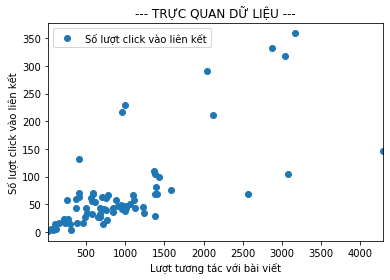

In [12]:
#----------KIỂM TRA TƯƠNG QUAN 2 BIẾN---------------
#thay biến vào vị trí
cleanedList = [x for x in dataset if str(x) != 'NaN']
dataset.plot(x='Lượt tương tác với bài viết', 
             y='Số lượt click vào liên kết', 
             style='o')
#------------------ đặt tên tiêu đề-----------------  
plt.title('--- TRỰC QUAN DỮ LIỆU ---')  
plt.xlabel('Lượt tương tác với bài viết')  
plt.ylabel('Số lượt click vào liên kết')  
plt.show()

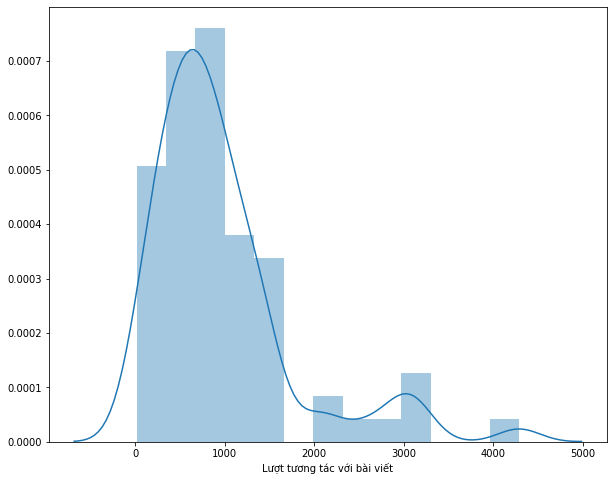

In [13]:
#--------XÁC ĐỊNH PHÂN PHỐI CHUẨN 1 BIẾN------------
plt.figure(figsize=(10,8))
plt.tight_layout()
#đưa biến phụ thuộc vào vị trí
seabornInstance.distplot(dataset['Lượt tương tác với bài viết'])

[2.03871659]
[[0.06665071]]
kiểm định thực tế và dự báo
    Actual   Predicted
0       71   29.165557
1       64   29.832064
2       43   47.361201
3      217   66.023401
4       51   72.821774
5       44   58.091966
6       27   45.428331
7       16   17.301730
8      132   29.632112
9       23   16.901826
10      27   47.627804
11       6   10.103453
12      57   76.087658
13      62   52.160053
14     211  143.004974
--- THỰC TẾ & DỰ BÁO ---


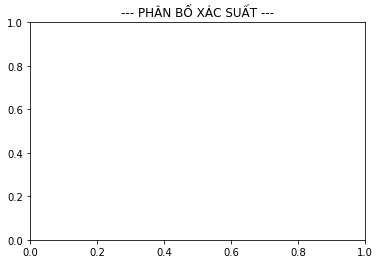

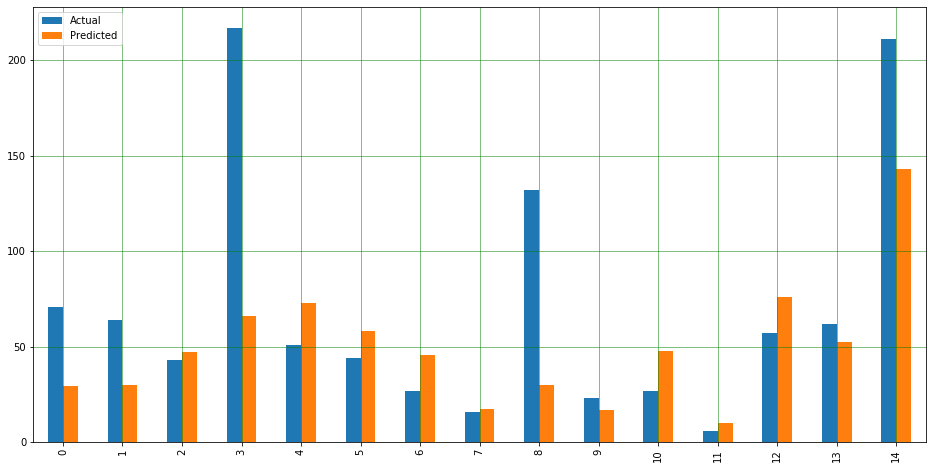

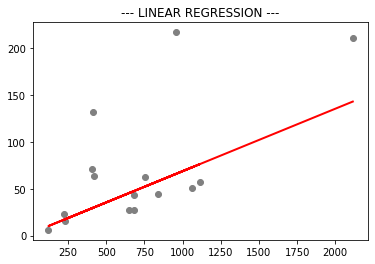

Mean Absolute Error (MSE): 34.47359543023757
Mean Squared Error: 2852.6531327904104
Root Mean Squared Error (RMSE): 53.41023434502427
>>>>>> R Squared - Độ phù hợp của mô hình: 0.29025453551691927
RMSE/MSE -1 = 0.5493084976618638


In [16]:
#---------------------TÍNH HỒI QUY------------------
X = dataset['Lượt tương tác với bài viết'].values.reshape(-1,1)
y = dataset['Số lượt click vào liên kết'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)
#thiết lập hồi quy tuyến tính
plt.title('--- PHÂN BỐ XÁC SUẤT ---')  
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(),
                   'Predicted': y_pred.flatten()})
print('kiểm định thực tế và dự báo')
print(df)

#trực quan mô hình hồi quy tuyến tính
df1 = df.head(25)
print('--- THỰC TẾ & DỰ BÁO ---')
df1.plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', 
         color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', 
         color='black')
plt.show()

# vẽ đường hồi quy tuyến tính
plt.title('--- LINEAR REGRESSION ---')
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

#-----------KẾT LUẬN MÔ HÌNH ---------------------
print('Mean Absolute Error (MSE):', 
      metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error (RMSE):', 
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#RMSE và MSE là phương pháp dự báo độ chính xác của mô hình
#RMSE luôn >=MSE, RMSE càng gần MSE thì mô hình dự báo càng chính xác
from sklearn.metrics import r2_score
print('>>>>>> R Squared - Độ phù hợp của mô hình:',
      r2_score(y_test, y_pred))

a=float(((np.sqrt(metrics.mean_squared_error(y_test, y_pred)))/(metrics.mean_absolute_error(y_test, y_pred)))-1)
if a<=0.05:
    print('độ chính xác cao')
    if a<0.1 and a>0.05:
        print('độ chính xác tương đối')
else:
    print('RMSE/MSE -1 =',a)